In [1]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto_data = pd.read_table(path, sep='\s+', header=None, na_values='?')

In [3]:
auto_data.columns = ['mpg','cyl','disp','hp','wt','acc','year','origin','name']

In [4]:
auto_data.head()

,mpg,cyl,disp,hp,wt,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
auto_cluster = auto_data[['mpg','disp','hp','wt','acc']]

In [6]:
len(auto_cluster), len(auto_cluster.dropna())

(398, 392)

In [7]:
auto_cluster_complete = auto_cluster.dropna()

In [8]:
auto_cluster_complete.var()

mpg         60.918142
disp     10950.367554
hp        1481.569393
wt      721484.709008
acc          7.611331
dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
std = StandardScaler()

In [12]:
auto_cluster_complete_scaled = std.fit_transform(auto_cluster_complete)

In [23]:
auto_cluster_complete_scaled.var()

1.0

In [13]:
pd.DataFrame(auto_cluster_complete_scaled).var()

0    1.002558
1    1.002558
2    1.002558
3    1.002558
4    1.002558
dtype: float64

In [14]:
S = []
for k in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=k, n_init=50)
    labels = km.fit(auto_cluster_complete_scaled).labels_
    s_k = silhouette_score(auto_cluster_complete_scaled, labels)
    S.append(s_k)

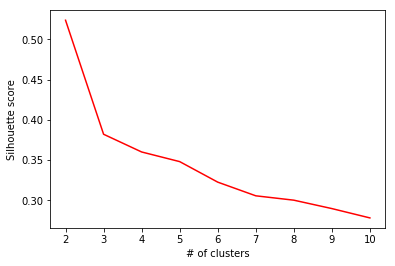

In [15]:
plt.plot([2,3,4,5,6,7,8,9,10], S, c='red')
plt.xlabel("# of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [16]:
km = KMeans(n_clusters=2, n_init=50)
labels = km.fit(auto_cluster_complete_scaled).labels_

In [17]:
auto_cluster_complete['label'] = labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
auto_cluster_complete.head()

,mpg,disp,hp,wt,acc,label
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1


In [19]:
auto_cluster_complete.groupby('label').mean()

,mpg,disp,hp,wt,acc
label,,,,,
0,26.464605,141.974227,85.144330,2581.140893,16.512027
1,14.748515,345.495050,160.148515,4119.811881,12.744554


In [20]:
# Visualization of clusters using PCA scores
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # First two components for visualization

In [21]:
PCA_scores = pca.fit_transform(auto_cluster_complete_scaled)
pca.explained_variance_ratio_ # Proportion of total variance explained by the two principal components

array([0.78535088, 0.14240113])

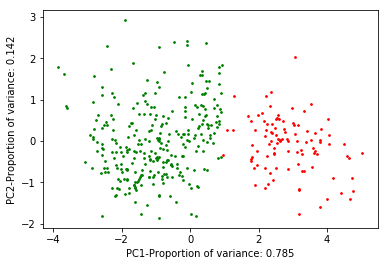

In [22]:
plt.scatter(PCA_scores[labels==0,0],PCA_scores[labels==0,1],c='green', s = 3)
plt.scatter(PCA_scores[labels==1,0],PCA_scores[labels==1,1],c='red', s = 3)
plt.xlabel("PC1-Proportion of variance: {0:0.3f}".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PC2-Proportion of variance: {0:0.3f}".format(pca.explained_variance_ratio_[1]))
plt.show()